In [ ]:
# import libraries
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import random
import requests
import re

In [ ]:
# define scope for scraping
starturl = "https://en.wikipedia.org/wiki/List_of_common_misconceptions"
startdomain = "https://en.wikipedia.org"

In [ ]:
# scrape start page
res = requests.get(starturl)
soup = bs(res.text, "html.parser")

In [ ]:
# fill 1st array with links from start page
# https://stackoverflow.com/a/46328822
# https://www.kindacode.com/article/extract-all-links-from-a-webpage-using-python-and-beautiful-soup-4/
links1 = []
links1.append(starturl)
for item1 in soup.find_all("a"):
    url = startdomain + item1.get("href", "")
    if ("/wiki/Wikipedia:" not in url) and ("/wiki/" in url):
        links1.append(url)
print(len(links1))

2481


In [ ]:
# show content of array
print(links1)

['https://en.wikipedia.org/wiki/List_of_common_misconceptions', 'https://en.wikipedia.org/wiki/Factoid', 'https://en.wikipedia.org/wiki/Conventional_wisdom', 'https://en.wikipedia.org/wiki/Old_wives%27_tale', 'https://en.wikipedia.org/wiki/Stereotypes', 'https://en.wikipedia.org/wiki/Pseudoscience', 'https://en.wikipedia.org/wiki/Urban_legend', 'https://en.wikipedia.org/wiki/Moral_panic', 'https://en.wikipedia.org/wiki/Searing', 'https://en.wikipedia.org/wiki/Browning_(partial_cooking)', 'https://en.wikipedia.org/wiki/Twinkie', 'https://en.wikipedia.org/wiki/Junk_food', 'https://en.wikipedia.org/wiki/Shelf_life', 'https://en.wikipedia.org/wiki/Sorbic_acid', 'https://en.wikipedia.org/wiki/Poisoned_candy_myths', 'https://en.wikipedia.org/wiki/Halloween', 'https://en.wikipedia.org/wiki/Perishable_food', 'https://en.wikipedia.org/wiki/Expiration_date', 'https://en.wikipedia.org/wiki/Chili_peppers', 'https://en.wikipedia.org/wiki/Capsaicin', 'https://en.wikipedia.org/wiki/Pungency', 'https:

There are three items that contain text in Wikipedia pages: paragraphs, lists and headlines.

In [ ]:
# get paragraphs from start page
# https://www.geeksforgeeks.org/beautifulsoup-scraping-paragraphs-from-html/

def getparagraphtokens():
  tok = []
  #paragraphs = []
  for p in soup.find_all("p"):
      para1 = p.get_text()
      para1 = para1.lower()
      para1 = re.sub("\\n", "", para1)
      tok.extend(re.split('\W+',para1))
      #paragraphs.append(para1)
  #print(paragraphs)
  return(tok)

In [ ]:
# get lists from start page

def getlisttokens():
  tok = []
  #lists = []
  for l in soup.find_all("li"):
      li1 = l.get_text()
      li1 = li1.lower()
      li1 = re.sub("\\n", "", li1)
      li1 = re.sub("\.", "", li1)
      li1 = re.sub("\d", "", li1)
      tok.extend(re.split('\W+',li1))
      #lists.append(li1)
  #print(lists)
  return(tok)

In [ ]:
# get headlines from start page

def getheadlinetokens():
  tok = []
  #headlines = []
  for h in soup.find_all("h2"):
      head2 = h.get_text()
      head2 = head2.lower()
      head2 = re.sub("\[edit\]", "", head2)
      tok.extend(re.split('\W+',head2))
      #headlines.append(head2)
  for h in soup.find_all("h3"):
      head3 = h.get_text()
      head3 = head3.lower()
      head3 = re.sub("\[edit\]", "", head3)
      head3 = re.sub("\\n", "", head3)
      tok.extend(re.split('\W+',head3))
      #headlines.append(head3)
  for h in soup.find_all("h4"):
      head4 = h.get_text()
      head4 = head4.lower()
      head4 = re.sub("\[edit\]", "", head4)
      tok.extend(re.split('\W+',head4))
      #headlines.append(head4)
  #print(headlines)
  return(tok)

In [ ]:
#https://deviceatlas.com/blog/list-of-user-agent-strings

def getheaders():
    r = random.randint(1,15)
    if r == 1: header={"User-Agent":"Mozilla/5.0 (Linux; Android 10; SM-G996U Build/QP1A.190711.020; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 2: header={"User-Agent":"Mozilla/5.0 (Linux; Android 9; SM-G973U Build/PPR1.180610.011) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 3: header={"User-Agent":"Mozilla/5.0 (Linux; Android 7.0; SM-G930VC Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/58.0.3029.83 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 4: header={"User-Agent":"Mozilla/5.0 (Linux; Android 11; Pixel 5 Build/RQ3A.210805.001.A1; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/92.0.4515.159 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 5: header={"User-Agent":"Mozilla/5.0 (Linux; Android 10; Google Pixel 4 Build/QD1A.190821.014.C2; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/78.0.3904.108 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 6: header={"User-Agent":"Mozilla/5.0 (Linux; Android 8.0.0; Pixel 2 Build/OPD1.170811.002; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/59.0.3071.125 Mobile Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 7: header={"User-Agent":"Mozilla/5.0 (iPhone13,2; U; CPU iPhone OS 14_0 like Mac OS X) AppleWebKit/602.1.50 (KHTML, like Gecko) Version/10.0 Mobile/15E148 Safari/602.1","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 8: header={"User-Agent":"Mozilla/5.0 (iPhone12,1; U; CPU iPhone OS 13_0 like Mac OS X) AppleWebKit/602.1.50 (KHTML, like Gecko) Version/10.0 Mobile/15E148 Safari/602.1","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 9: header={"User-Agent":"Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 10: header={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 11: header={"User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 12: header={"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 13: header={"User-Agent":"Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 14: header={"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    elif r == 15: header={"User-Agent":"Mozilla/5.0 (Linux; Android 4.4.3; KFTHWI Build/KTU84M) AppleWebKit/537.36 (KHTML, like Gecko) Silk/47.1.79 like Chrome/47.0.2526.80 Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}
    return(header)

In [ ]:
# get tokens for each 1st level link
#https://towardsdatascience.com/web-scraping-with-beautiful-soup-a-use-case-fc1c60c8005d

from time import sleep

tokencount = []
vocabcount = []

session = requests.Session()
tokens = []
i = 0
for item1 in links1:
    i = i + 1
    UA = getheaders() #rotate headers each time
    res = session.get(item1, headers=UA)
    soup = bs(res.text, "html.parser")

    tokens.extend(getparagraphtokens())
    tokens.extend(getlisttokens())
    tokens.extend(getheadlinetokens())

    tokencount.append(len(tokens))
    vocabcount.append(len(set(tokens)))
    sleep(3) #20 pages per minute

    if len(tokens) >= 1000000: 
      break
      

In [ ]:
print(i)
print(item1)
print(len(tokens))

138
https://en.wikipedia.org/wiki/American_Old_West
1023591


In [ ]:
np.savetxt("tokenswiki3.csv", tokens, delimiter =", ", fmt ='% s')

In [ ]:
chartdata = pd.DataFrame( {
    'tokens': tokencount, 
    'vocabs': vocabcount
} )
print(chartdata)

      tokens  vocabs
0      40094    8311
1      41835    8566
2      43119    8707
3      43796    8765
4      54733   10007
..       ...     ...
133   932382   59071
134   958705   59793
135   962132   59909
136   989125   60594
137  1023591   61484

[138 rows x 2 columns]


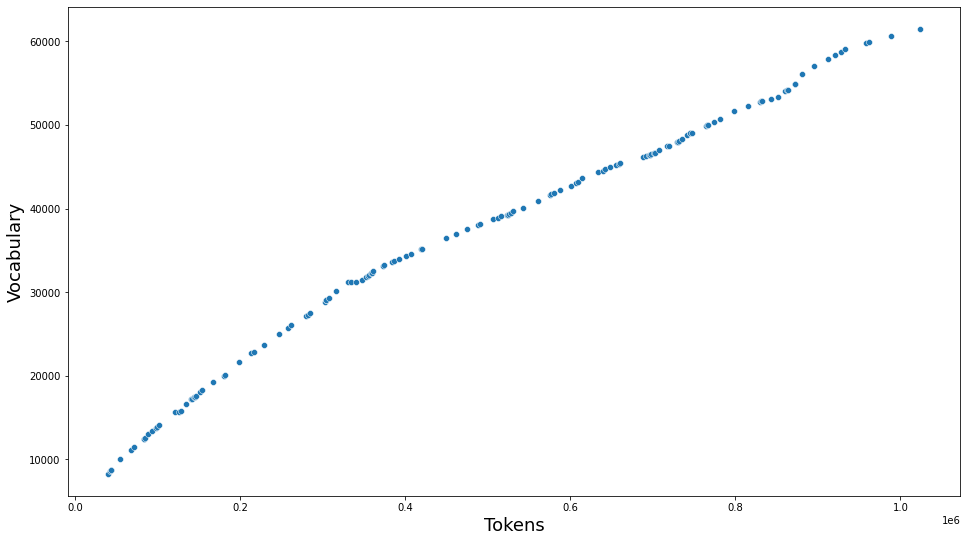

In [ ]:
import seaborn as sb

fig, scatter = plt.subplots(figsize = (16,9))
scatter = sb.scatterplot(x = 'tokens', y ='vocabs', data=chartdata)
scatter.set_xlabel('Tokens', fontsize = 18);
scatter.set_ylabel ('Vocabulary', fontsize = 18);

The following cells are optional to continue navigating and scraping links one level deeper.

In [ ]:
# save 1st level links to text file
np.savetxt("links1", links1, delimiter =", ", fmt ='% s')

In [ ]:
# fill 2nd array with first-level links from 1st array

session = requests.Session()
links2 = []
i = 0
for item1 in links1:
    i = i + 1
    UA = getheaders() #rotate headers each time
    res = session.get(item1, headers=UA)
    soup = bs(res.text, "html.parser")
    for item2 in soup.find_all("a"):
        url = startdomain + link.get("href", "")
        if ("/wiki/Wikipedia:" not in url) and ("/wiki/" in url):
        links2.append(url)
    sleep(3) #20 pages per minute
print(len(links2))

In [ ]:
# save 2nd level links to text file
np.savetxt("links2", links2, delimiter =", ", fmt ='% s')